# 1) Caso em que os dados são perfeitamente separáveis no espaço

## Import dos pacotes e dados

In [305]:
# Import dos pacotes e dados 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.markers
from PIL import Image, ImageDraw
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.text import Annotation

plt.style.use('seaborn')


INPUT_DIR = 'C:/Users/Igor/Desktop/TÓPICOS 2/Bancos'

iris = pd.read_csv(f'{INPUT_DIR}/IRIS.csv') #Iris Flower Dataset

In [306]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs)


def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)


class Annotation3D(Annotation):

    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0, 0), *args, **kwargs)
        self._xyz = xyz

    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, self.axes.M)
        self.xy = (x2, y2)
        super().draw(renderer)

def _annotate3D(ax, text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''

    annotation = Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)

setattr(Axes3D, 'annotate3D', _annotate3D)

## Visualização das observações no espaço

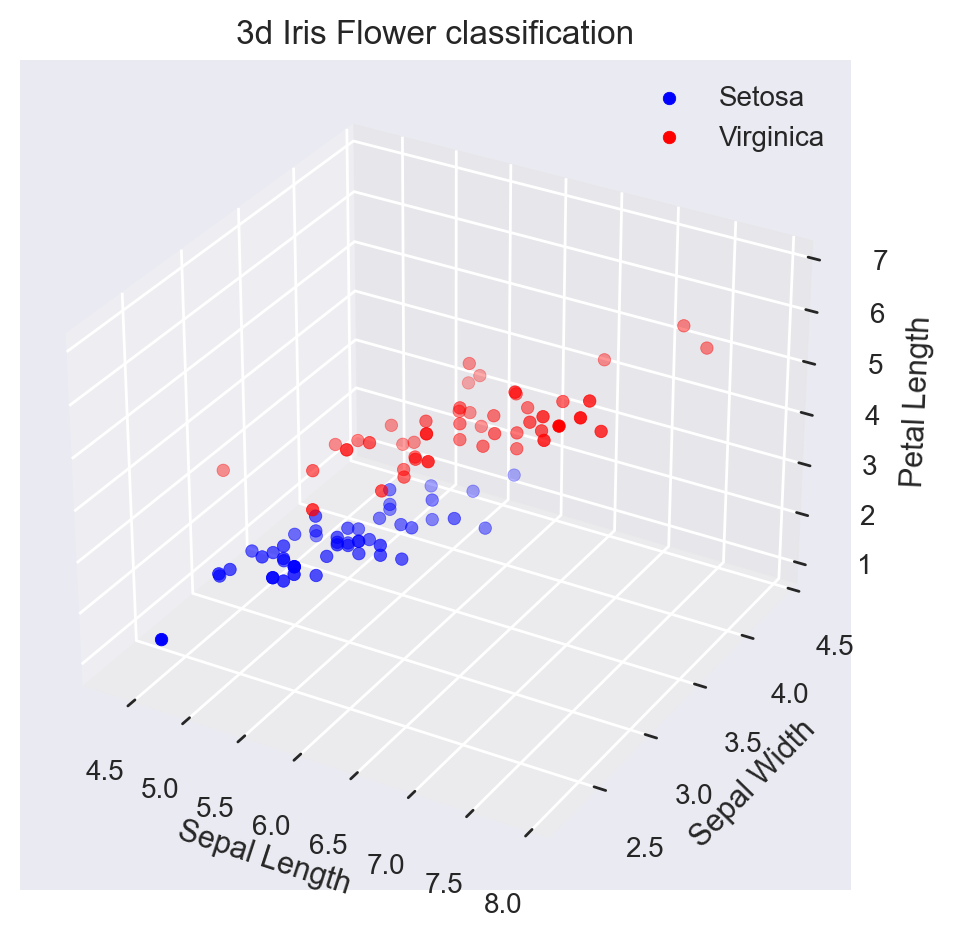

In [307]:
# Visualização das observações no espaço


x11_set = iris['sepal_length'][iris['species']=='Iris-setosa']
x21_set = iris['sepal_width'][iris['species']=='Iris-setosa']
x31_set = iris['petal_length'][iris['species']=='Iris-setosa']

x12_set = iris['sepal_length'][iris['species']=='Iris-virginica']
x22_set = iris['sepal_width'][iris['species']=='Iris-virginica']
x32_set = iris['petal_length'][iris['species']=='Iris-virginica']

#x13_set = iris['sepal_length'][iris['species']=='Iris-versicolor']
#x23_set = iris['sepal_width'][iris['species']=='Iris-versicolor']
#x33_set = iris['petal_length'][iris['species']=='Iris-versicolor']

fig = plt.figure(dpi=200)


ax = plt.axes(projection ='3d')



ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Virginica')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Iris Flower classification')


plt.legend()


plt.show()

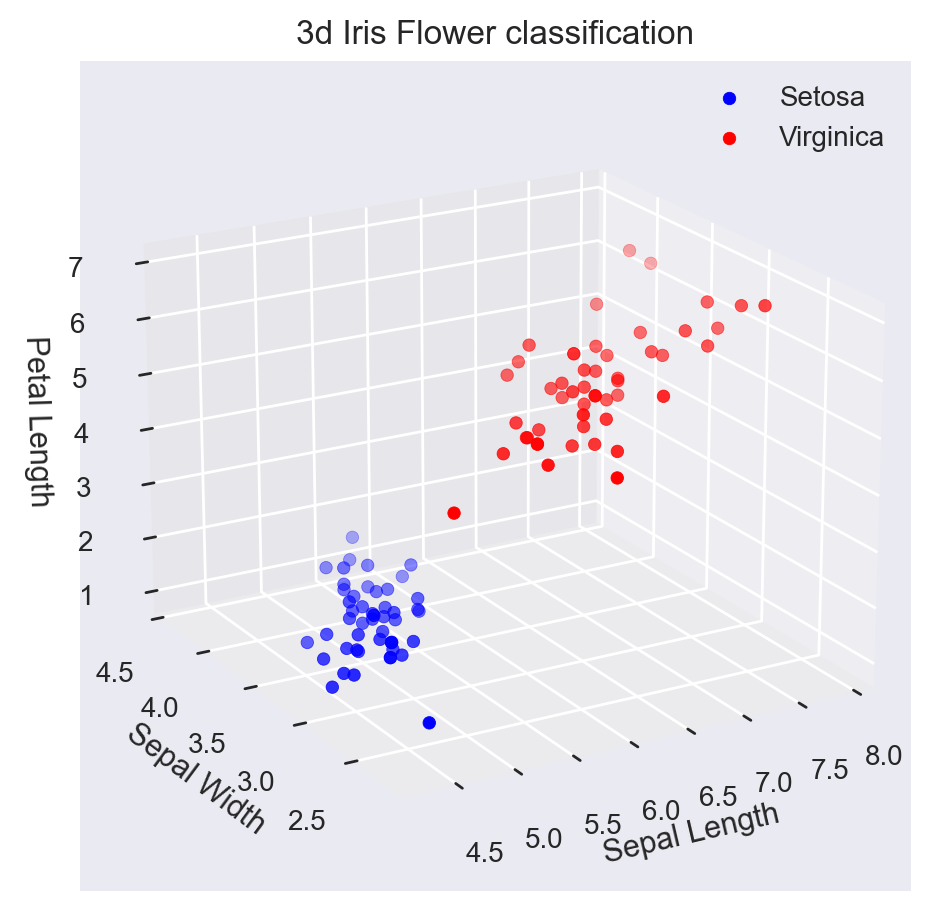

In [308]:
# Visualização das observações no espaço


x11_set = iris['sepal_length'][iris['species']=='Iris-setosa']
x21_set = iris['sepal_width'][iris['species']=='Iris-setosa']
x31_set = iris['petal_length'][iris['species']=='Iris-setosa']

x12_set = iris['sepal_length'][iris['species']=='Iris-virginica']
x22_set = iris['sepal_width'][iris['species']=='Iris-virginica']
x32_set = iris['petal_length'][iris['species']=='Iris-virginica']

#x13_set = iris['sepal_length'][iris['species']=='Iris-versicolor']
#x23_set = iris['sepal_width'][iris['species']=='Iris-versicolor']
#x33_set = iris['petal_length'][iris['species']=='Iris-versicolor']

fig = plt.figure(dpi=200)


ax = plt.axes(projection ='3d')



ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Virginica')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Iris Flower classification')

ax.view_init(20, -120) #mudei o angulo de visualização


plt.legend()
plt.show()

## Candidato 1 ao Maximal Margin Classifier

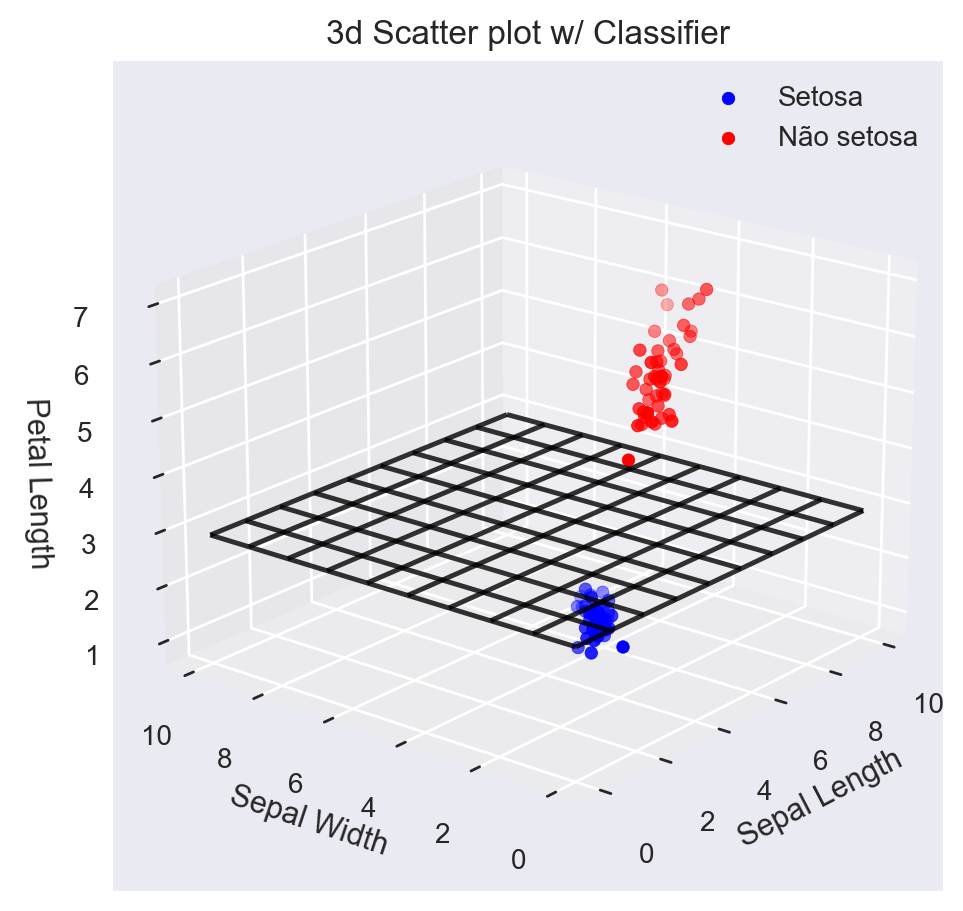

In [309]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier

# candidato 1
p1 = np.array([7, 4, 2.9]) #ponto no hyperplano1

beta1 = np.array([0,0,1]) #vetor normal ao hyperplano1

beta01 = np.inner(p1, beta1)


#modulo_beta = np.sqrt(beta[0]**2 + beta[1]**2 + beta[2]**2) #tamanho de beta

#margem = 1/modulo_beta


x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')
ax.plot_wireframe(a, b, Hyperplane1, color ='black', alpha = 0.8)

ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')


ax.view_init(20, -141)

plt.legend()

plt.show()

## Candidato 2 ao Maximal Margin Classifier

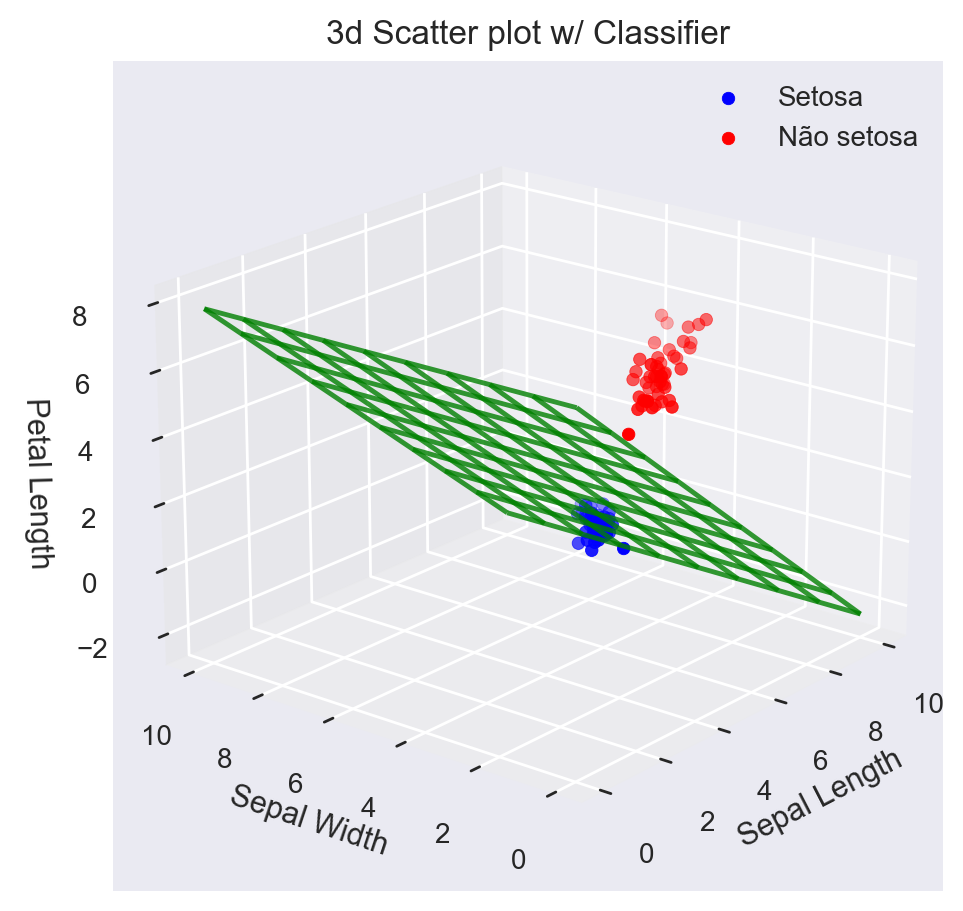

In [310]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier


# candidato 2

p2 = np.array([5.1, 4, 2.7]) #ponto no hyperplano2

beta2 = np.array([1,0,1]) #vetor normal ao hyperplano2

beta02 = np.inner(p2, beta2)


x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')

ax.plot_wireframe(a, b, Hyperplane2, color ='green', alpha = 0.8)

ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')

plt.legend()

ax.view_init(20, -141)
plt.show()

## Candidato 3 ao Maximal Margin Classifier

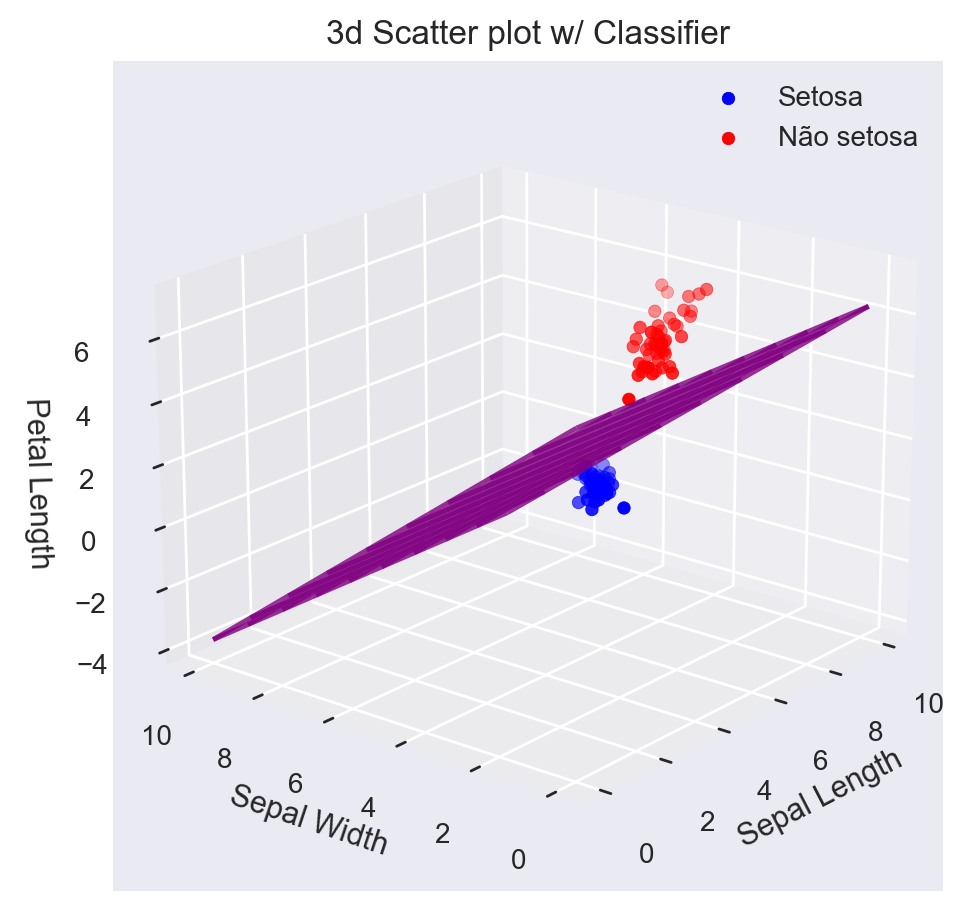

In [311]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier

# candidato 3

p3 = np.array([5, 4, 2.3]) #ponto no hyperplano3

beta3 = np.array([0,1,1]) #vetor normal ao hyperplano3

beta03 = np.inner(p3, beta3)

x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')

ax.plot_wireframe(a, b, Hyperplane3, color ='purple', alpha = 0.8)


ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')

plt.legend()
ax.view_init(20, -141)
plt.show()

## Gráfico unindo os 3 candidatos ao Maximal Margin Classifier

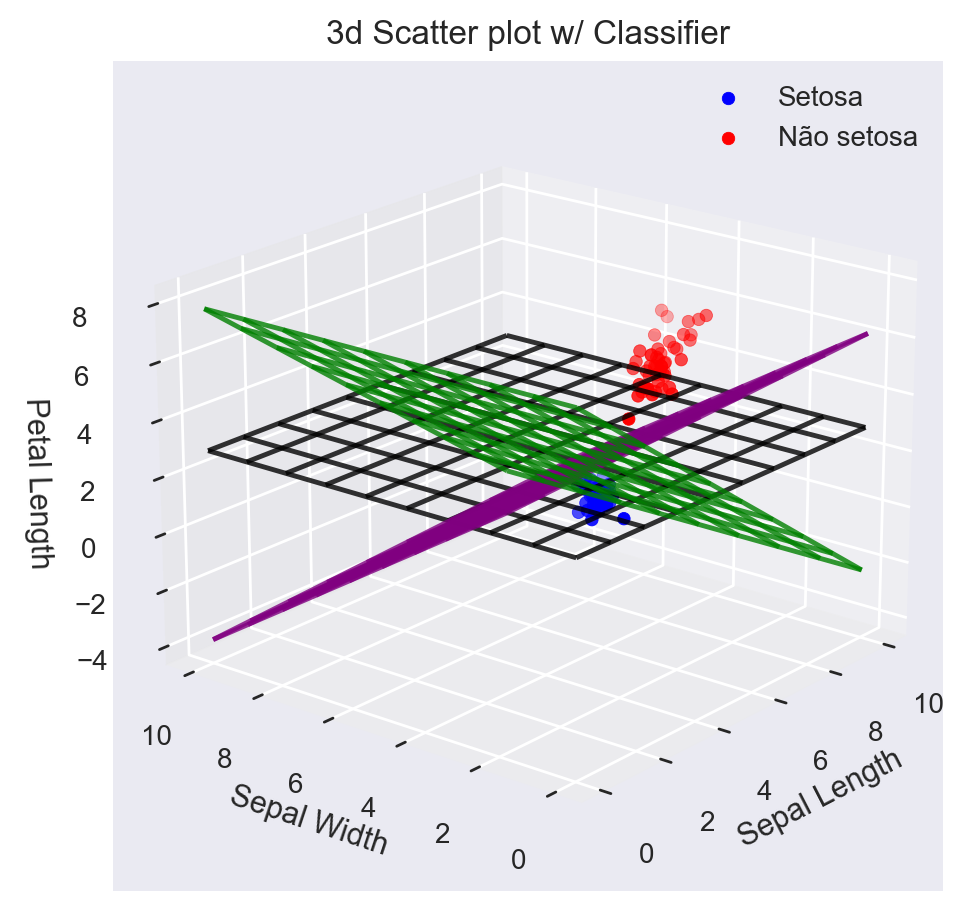

In [312]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier

# candidato 3

p3 = np.array([5, 4, 2.2]) #ponto no hyperplano3

beta3 = np.array([0,1,1]) #vetor normal ao hyperplano3

beta03 = np.inner(p3, beta3)

x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')

ax.plot_wireframe(a, b, Hyperplane1, color ='black', alpha = 0.8)
ax.plot_wireframe(a, b, Hyperplane2, color ='green', alpha = 0.8)
ax.plot_wireframe(a, b, Hyperplane3, color ='purple', alpha = 0.8)


ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')

plt.legend()
ax.view_init(20, -141)
plt.show()

## Vamos escolher o melhor entre os 3

### Opção 1

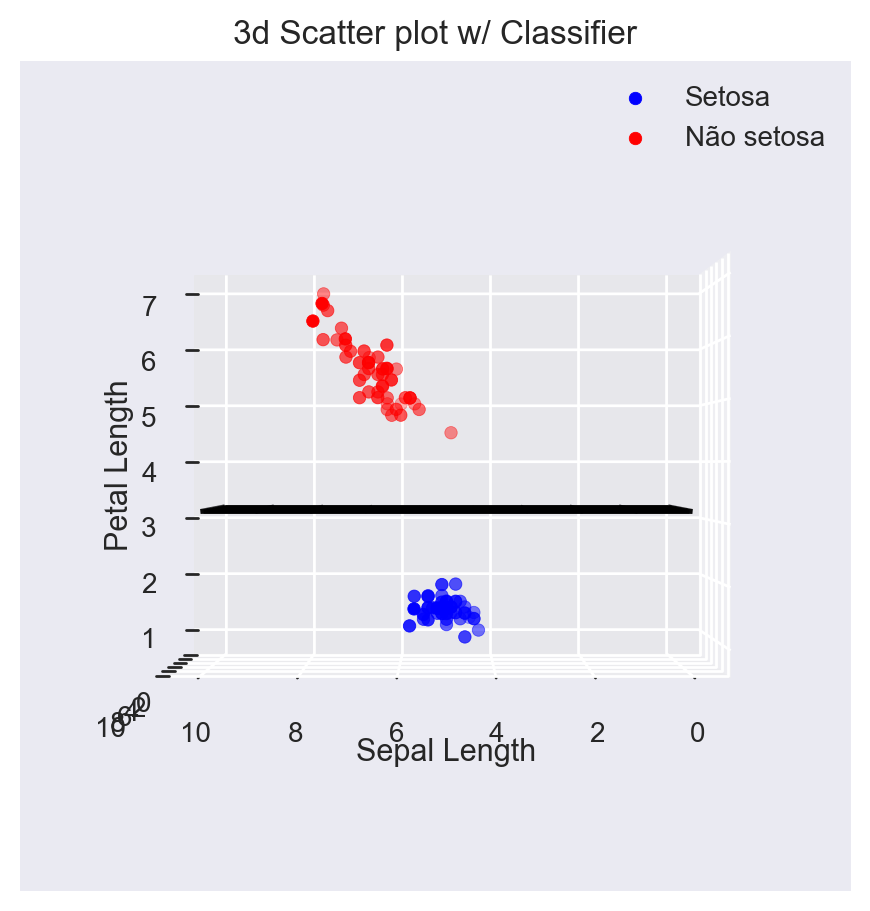

In [313]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier

# candidato 1
p1 = np.array([7, 4, 3.2]) #ponto no hyperplano1

beta1 = np.array([0,0,1]) #vetor normal ao hyperplano1

beta01 = np.inner(p1, beta1)


#modulo_beta = np.sqrt(beta[0]**2 + beta[1]**2 + beta[2]**2) #tamanho de beta

#margem = 1/modulo_beta


x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')
ax.plot_wireframe(a, b, Hyperplane1, color ='black', alpha = 0.8)

ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
#ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')


ax.view_init(0, 90)

plt.legend()

plt.show()

### Opção 2

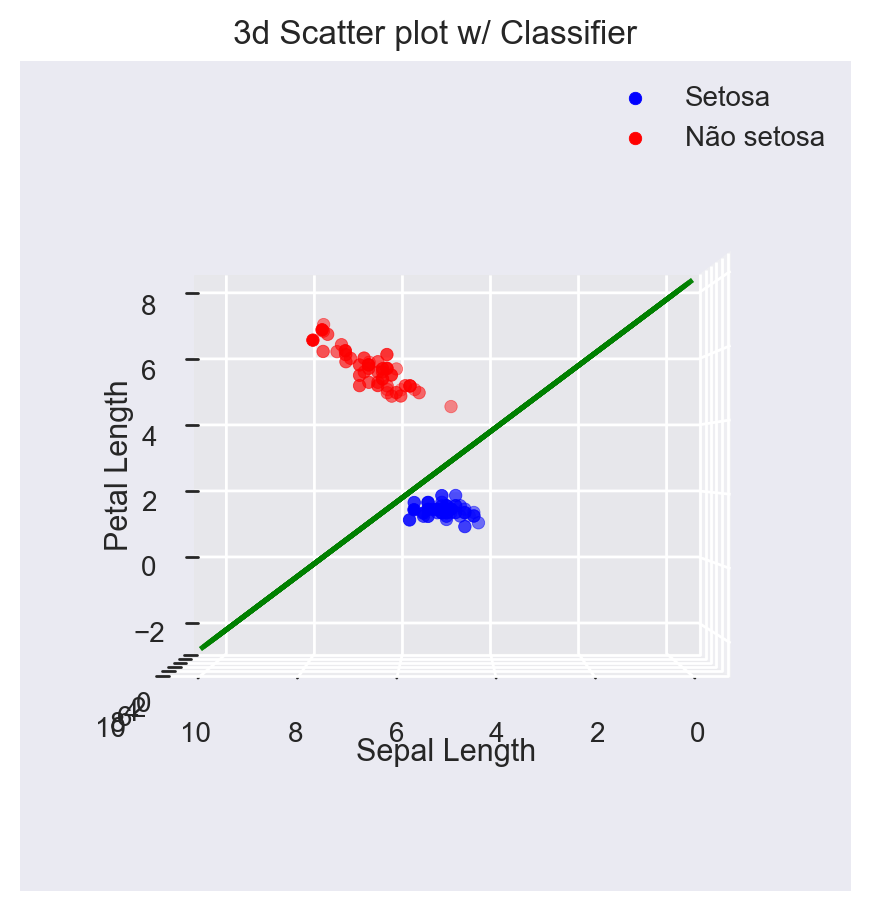

In [314]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier


# candidato 2

p2 = np.array([5.1, 4, 2.7]) #ponto no hyperplano2

beta2 = np.array([1,0,1]) #vetor normal ao hyperplano2

beta02 = np.inner(p2, beta2)


x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')

ax.plot_wireframe(a, b, Hyperplane2, color ='green', alpha = 0.8)

ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
#ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')

plt.legend()

ax.view_init(0, 90)
plt.show()

### Opção 3

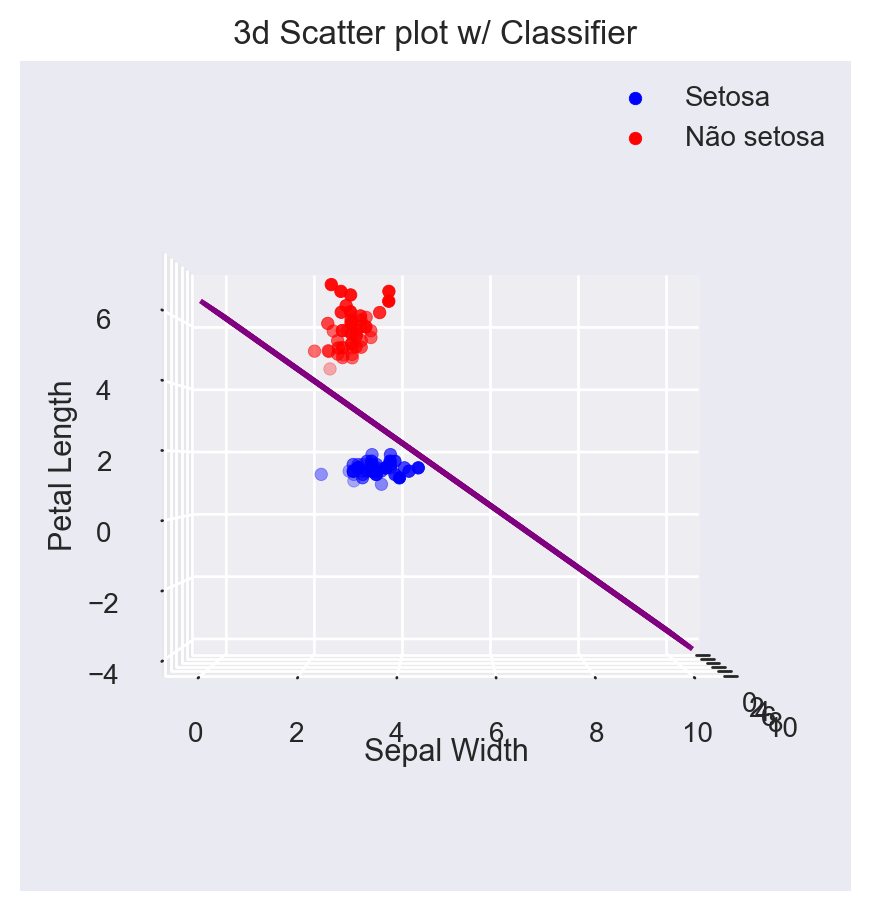

In [315]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier

# candidato 3

p3 = np.array([5, 4, 2.3]) #ponto no hyperplano3

beta3 = np.array([0,1,1]) #vetor normal ao hyperplano3

beta03 = np.inner(p3, beta3)

x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')

ax.plot_wireframe(a, b, Hyperplane3, color ='purple', alpha = 0.8)


ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

#ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')

plt.legend()
ax.view_init(0,0)
plt.show()

# O candidato 1 parece ser mais adequado

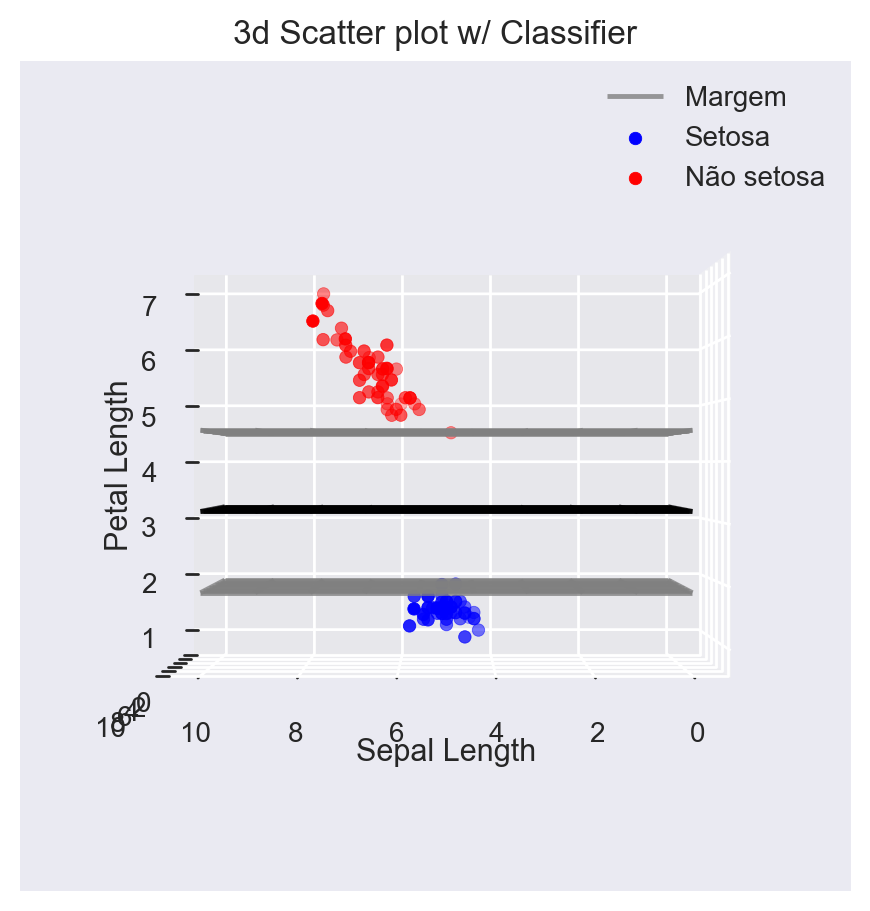

In [316]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier

# candidato 1
p1 = np.array([7, 4, 3.2]) #ponto no hyperplano1

beta1 = np.array([0,0,1]) #vetor normal ao hyperplano1

beta01 = np.inner(p1, beta1)

margem = 1.3


x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')

ax.plot_wireframe(a, b, Hyperplane1, color ='black', alpha = 0.8) # hyperplano
ax.plot_wireframe(a, b, Hyperplane1+margem, color ='grey', alpha = 0.8, label = 'Margem') # margem
ax.plot_wireframe(a, b, Hyperplane1-margem, color ='grey', alpha = 0.8) # margem

ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
#ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')



ax.view_init(0, 90)

plt.legend()


plt.show()

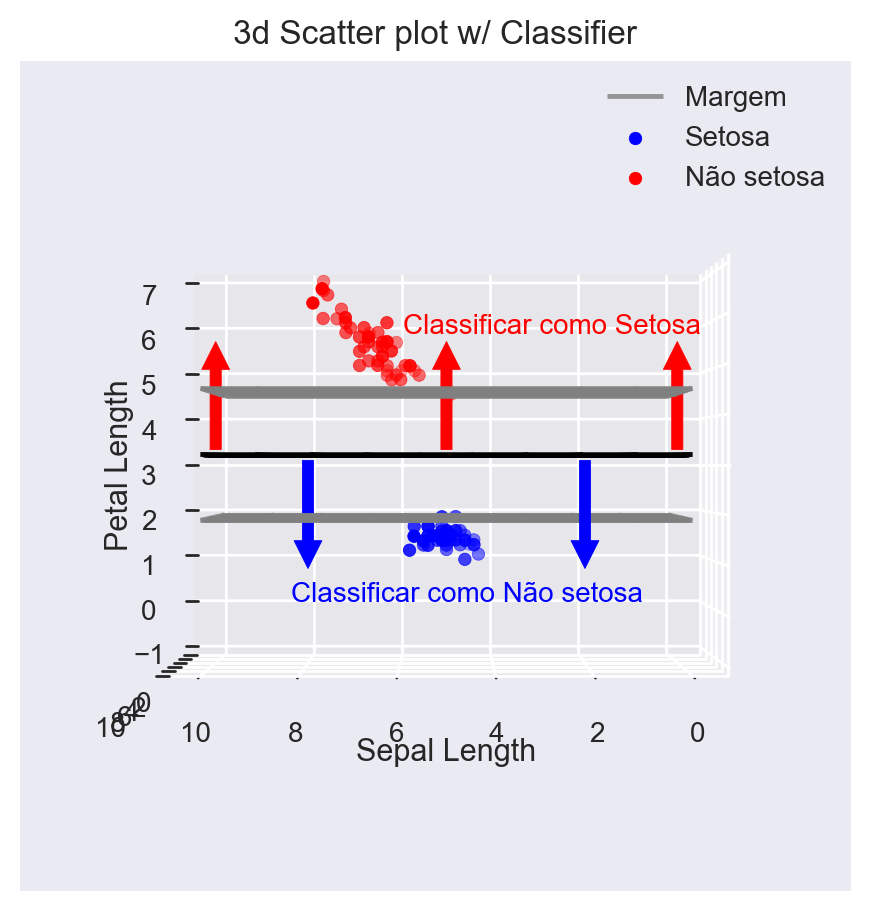

In [317]:
# Dados são perfeitamente separáveis => Maximal Margin Classifier

# candidato 1
p1 = np.array([7, 4, 3.2]) #ponto no hyperplano1

beta1 = np.array([0,0,1]) #vetor normal ao hyperplano1

beta01 = np.inner(p1, beta1)

margem = 1.3


x = np.linspace( 0 , 10 , 10 )
y = np.linspace( 0 , 10 , 10 )

a, b = np.meshgrid( x , y )

Hyperplane1 = (beta01 -(a*beta1[0])-(b*beta1[1]))/beta1[2]
Hyperplane2 = (beta02 -(a*beta2[0])-(b*beta2[1]))/beta2[2]
Hyperplane3 = (beta03 -(a*beta3[0])-(b*beta3[1]))/beta3[2]

fig = plt.figure(dpi = 200)
ax = plt.axes(projection ='3d')

ax.plot_wireframe(a, b, Hyperplane1, color ='black', alpha = 0.8) # hyperplano
ax.plot_wireframe(a, b, Hyperplane1+margem, color ='grey', alpha = 0.8, label = 'Margem') # margem
ax.plot_wireframe(a, b, Hyperplane1-margem, color ='grey', alpha = 0.8) # margem

ax.scatter(x11_set, x21_set, x31_set, c = 'blue', label = 'Setosa')

ax.scatter(x12_set, x22_set, x32_set, c = 'red', label = 'Não setosa')

#ax.scatter(x13_set, x23_set, x33_set, c = 'red')

ax.set_xlabel('Sepal Length')
#ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

ax.set_title('3d Scatter plot w/ Classifier')



ax.view_init(0, 90)

plt.legend()

ax.arrow3D(5, 4, 3.2,
           0, 0, 2.5,
           mutation_scale=20,
           ec ='red',
           fc='red')

ax.arrow3D(10, 4, 3.2,
           0, 0, 2.5,
           mutation_scale=20,
           ec ='red',
           fc='red')

ax.arrow3D(0, 4, 3.2,
           0, 0, 2.5,
           mutation_scale=20,
           ec ='red',
           fc='red')

ax.annotate3D('Classificar como Setosa', (6, 4, 5.7), xytext=(1, 1), textcoords='offset points', color = 'red')

ax.arrow3D(8, 4, 3.2,
           0, 0, -2.5,
           mutation_scale=20,
           ec ='blue',
           fc='blue')


ax.arrow3D(2, 4, 3.2,
           0, 0, -2.5,
           mutation_scale=20,
           ec ='blue',
           fc='blue')

ax.annotate3D('Classificar como Não setosa', (8.5, 2, 0), xytext=(1, 1), textcoords='offset points', color= 'blue')

ax.set_zlim(-1,7)

plt.show()